In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot as plt

repo_dir = os.getcwd() + '/repo'
tft_dir = os.path.join(repo_dir, 'tft')
os.chdir(tft_dir)

import warnings  
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!ls

 carriage_services.csv		     'outputs_mobiact(v2)_swa'
 data_formatters		     'outputs_mobiact(v2)_swa2'
 data_formatters.zip		     'outputs_mobiact(v2)(undersampling)'
 dlr_preprocessed		     'outputs_mobiact(v2)_wo_pinfo'
 dlr_tft_results		      outputs_mobiact_wo_age
 ETTm1.csv			      outputs_mobiact_wo_gender
 ETTm2.csv			      outputs_mobiact_wo_known
 expt_settings			      outputs_mobiact_wo_known_no_bioinfo
 expt_settings.zip		      outputs_mobiact_wo_known_no_bioinfo2
 libs				      outputs_notchFall
 libs.zip			     'outputs_notchFall(oversampling)'
 mobiact_dataset		      outputs_notchFall_swa
 MobiAct_Dataset_v2.0.rar	     'outputs_notchFall(undersampling)'
 MobiAct_Dataset_v2-Copy1.0.rar       outputs_pm2.5
 mobiact_preprocessed		      outputs_smartFall
 MobiAct_preprocessed.zip	     'outputs_smartFall(oversampling)'
 mobi_tft_wo_known_no_bioinfo	      outputs_smartFall_swa
 mobi_tft_wo_known_results	     'outputs_smartFall(undersampling)'
 notch_dataset			      outputs_st

In [3]:
output_folder = os.path.join(os.getcwd(), 'outputs_dlr')   # Root folder to save experiment outputs
force_download = False 
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

## Data Sample

In [4]:
train = pd.read_csv('dlr_preprocessed/train.csv', index_col=0)
valid = pd.read_csv('dlr_preprocessed/valid.csv', index_col=0)
test = pd.read_csv('dlr_preprocessed/test.csv', index_col=0)

In [5]:
activity_info = ['FALLING', 'JUMPING', 'RUNNING', 'SITTING', 'STNDING', 'TRANSDW', 'TRANSUP', 'TRNSACC', 'TRNSDCC', 'WALKING', 'XLYINGX']

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(activity_info)

train_encoded = encoder.transform(train['labels'])
train['label_encoded'] = train_encoded

valid_encoded = encoder.transform(valid['labels'])
valid['label_encoded'] = valid_encoded

test_encoded = encoder.transform(test['labels'])
test['label_encoded'] = test_encoded

In [7]:
print(encoder.classes_, len(encoder.classes_))

['FALLING' 'JUMPING' 'RUNNING' 'SITTING' 'STNDING' 'TRANSDW' 'TRANSUP'
 'TRNSACC' 'TRNSDCC' 'WALKING' 'XLYINGX'] 11


In [8]:
train['known'] = 0
valid['known'] = 0
test['known'] = 0

In [9]:
test[test['labels'] == 'FALLING']['per_name'].unique()

array(['Sinja'], dtype=object)

In [11]:
valid[valid['per_idx'] == 3]

,time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,labels,per_name,per_idx,per_age,per_height,per_gender,label_encoded,known
0,17.15,-9.702358,0.020635,1.674165,0.013820,-0.013123,0.016836,1.273326,0.392144,0.312653,STNDING,Cristina,3,27.0,1.6,Female,4,0
1,17.16,-9.707232,0.025566,1.666926,0.004869,-0.003397,0.015052,1.267351,0.391066,0.307638,STNDING,Cristina,3,27.0,1.6,Female,4,0
2,17.17,-9.702337,0.011063,1.664216,-0.014894,-0.007078,0.016662,1.270401,0.394067,0.311236,STNDING,Cristina,3,27.0,1.6,Female,4,0
3,17.18,-9.692591,0.020641,1.671842,-0.007739,-0.015927,0.018439,1.270320,0.389785,0.311519,STNDING,Cristina,3,27.0,1.6,Female,4,0
4,17.19,-9.680356,-0.003477,1.661697,-0.005921,0.001813,0.018580,1.271230,0.391007,0.312000,STNDING,Cristina,3,27.0,1.6,Female,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18647,203.62,-9.446487,2.271615,1.531511,-0.006426,0.002052,0.010239,1.342089,0.087020,0.349809,STNDING,Cristina,3,27.0,1.6,Female,4,0
18648,203.63,-9.436739,2.278773,1.539082,-0.006437,-0.006810,0.010170,1.343735,0.086483,0.351201,STNDING,Cristina,3,27.0,1.6,Female,4,0
18649,203.64,-9.441596,2.269238,1.526646,0.000775,0.007439,0.008541,1.344754,0.087257,0.353424,STNDING,Cristina,3,27.0,1.6,Female,4,0
18650,203.65,-9.426953,2.274046,1.526921,0.006095,-0.005032,0.014754,1.343423,0.086178,0.350021,STNDING,Cristina,3,27.0,1.6,Female,4,0


In [12]:
train['per_idx'].unique(), valid['per_idx'].unique(), test['per_idx'].unique()

(array([ 8,  1, 13, 14, 10,  4,  0,  9, 18]),
 array([ 5,  3,  6, 16]),
 array([ 2,  7, 15, 11, 17]))

# Data Formatter

In [9]:
from data_formatters.base import GenericDataFormatter, DataTypes, InputTypes

# View avialable inputs and data types.
print("Available data types:")
for option in DataTypes:
    print(option)

print()
print("Avaialbe input types:")
for option in InputTypes:
    print(option)

Available data types:
DataTypes.REAL_VALUED
DataTypes.CATEGORICAL
DataTypes.DATE

Avaialbe input types:
InputTypes.TARGET
InputTypes.OBSERVED_INPUT
InputTypes.KNOWN_INPUT
InputTypes.STATIC_INPUT
InputTypes.ID
InputTypes.TIME


In [10]:
from libs import utils 
import sklearn.preprocessing
class DLRFormatter(GenericDataFormatter):
    _column_definition = [
        ('per_idx', DataTypes.CATEGORICAL, InputTypes.ID),
        ('time', DataTypes.REAL_VALUED, InputTypes.TIME),
        ('per_age', DataTypes.REAL_VALUED, InputTypes.STATIC_INPUT),
        ('per_height', DataTypes.REAL_VALUED, InputTypes.STATIC_INPUT),
        ('per_gender', DataTypes.CATEGORICAL, InputTypes.STATIC_INPUT),
        ('known', DataTypes.CATEGORICAL, InputTypes.KNOWN_INPUT),
        ('acc_x', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('acc_y', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('acc_z', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('gyro_x', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('gyro_y', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('gyro_z', DataTypes.REAL_VALUED, InputTypes.OBSERVED_INPUT),
        ('label_encoded', DataTypes.REAL_VALUED, InputTypes.TARGET)
    ]
    
    def __init__(self):
        """initializes formatter"""
        
        self.identifiers = None
        self._real_scalers = None
        self._cat_scalers = None
        self._target_scaler = None
        self._num_classes_per_cat_input = None
        self._time_steps = self.get_fixed_params()['total_time_steps']
    
    def split_data(self, train, valid, test):
        """
        split data frame into training-validation-test data frames
        
        """
        print('Formatting train-valid-test splits.')
        
        train_data = train

        val_data = valid
        
        test_data = test
        
        self.set_scalers(train_data)
        
        return (self.transform_inputs(data) for data in [train_data, val_data, test_data])
    
    def set_scalers(self, df):
        """
        Calibrates scalers using the data supplied.
        (제공된 데이터를 사용해서 scaler 교정)

        Args:
          df: Data to use to calibrate scalers.
        """
        print('Setting scalers with training data...')
        
        column_definitions = self.get_column_definition()

        id_column = utils.get_single_col_by_input_type(InputTypes.ID,
                                                       column_definitions)
        target_column = utils.get_single_col_by_input_type(InputTypes.TARGET,
                                                           column_definitions)
        # extract identifiers in case required
        self.identifiers = list(df[id_column].unique())
        
        # Format real scalers
        real_inputs = utils.extract_cols_from_data_type(
            DataTypes.REAL_VALUED, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        
        data = df[real_inputs].values
        self._real_scalers = sklearn.preprocessing.StandardScaler().fit(data)
        
        # target데이터를 prediction에 사용
        self._target_scaler = sklearn.preprocessing.StandardScaler().fit(df[[target_column]].values)
        categorical_inputs = utils.extract_cols_from_data_type(
            DataTypes.CATEGORICAL, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        categorical_scalers = {}
        num_classes = []
        for col in categorical_inputs:
            srs = df[col].apply(str)
            categorical_scalers[col] = sklearn.preprocessing.LabelEncoder().fit(srs.values)
            num_classes.append(srs.nunique())
        
        # set categorical scaler outputs
        self._cat_scalers = categorical_scalers
        self._num_classes_per_cat_input = num_classes
        
    def transform_inputs(self, df):
        """
        performs feature transformations.
        
        feature engineering, preprocessing and normalization을 포함
        
        Args:
            df - data frame to transform.
            
        Returns:
            Transformed data frame.
        """
        output = df.copy()
        
        if self._real_scalers is None and self._cat_scalers is None:
            raise ValueError('Scalers have not been set!')
        
        column_definitions = self.get_column_definition()
        id_col = utils.get_single_col_by_input_type(InputTypes.ID,
                                                column_definitions)

        real_inputs = utils.extract_cols_from_data_type(
            DataTypes.REAL_VALUED, column_definitions,
            {InputTypes.ID, InputTypes.TIME}
        )
        categorical_inputs = utils.extract_cols_from_data_type(
            DataTypes.CATEGORICAL, column_definitions,
            {InputTypes.ID, InputTypes.TIME})
        # Transform real inputs per entity
        df_list = []
        for identifier, sliced in df.groupby(id_col):
          # Filter out any trajectories that are too short
#           print(identifier)
          if len(sliced) >= self._time_steps:
            sliced_copy = sliced.copy()
            sliced_copy[real_inputs] = self._real_scalers.transform(
                sliced_copy[real_inputs].values)
            df_list.append(sliced_copy)

        output = pd.concat(df_list, axis=0)
        for col in categorical_inputs:
            string_df = df[col].apply(str)
            output[col] = self._cat_scalers[col].transform(string_df)
        return output
    
    def format_predictions(self, predictions):
        output = predictions.copy()
        
        column_names = predictions.columns
        for col in column_names:
            if col not in {'forecast_time', 'identifier'}:
                output[col] = self._target_scaler.inverse_transform(predictions[col])
                
        return output
    
    def get_fixed_params(self):
        fixed_params = {
            'total_time_steps': 100,     # Total width of the Temporal Fusion Decoder
            'num_encoder_steps': 50,    # Length of LSTM decoder (ie. # historical inputs)
            'num_epochs': 100,            # Max number of epochs for training
            'early_stopping_patience': 5, # Early stopping threshold for # iterations with no loss improvement
            'multiprocessing_workers': 5  # Number of multi-processing workers
        }
        
        return fixed_params
    
    def get_default_model_params(self):
        model_params = {
            'dropout_rate': 0.3,
            'hidden_layer_size': 160,
            'learning_rate': 0.01,
            'minibatch_size': 64,
            'max_gradient_norm': 0.01,
            'num_heads': 4,
            'stack_size': 1
        }

        return model_params

In [11]:
data_formatter = DLRFormatter()
train, valid, test = data_formatter.split_data(train, valid, test)
train_samples, valid_samples = data_formatter.get_num_samples_for_calibration(
  )

Formatting train-valid-test splits.
Setting scalers with training data...
0
1
4
8
9
10
13
14
18
3
5
6
16
2
7
11
15
17


# Model

In [12]:
import libs.hyperparam_opt
import libs.tft_model
import libs.utils as util

ModelClass = libs.tft_model.TemporalFusionTransformer
data_params = data_formatter.get_experiment_params()
param_ranges = ModelClass.get_hyperparm_choices()

In [13]:
model_params = {'dropout_rate': 0.3,      # Dropout discard rate
                'hidden_layer_size': 320, # Internal state size of TFT
                'learning_rate': 0.001,   # ADAM initial learning rate
                'minibatch_size': 256,    # Minibatch size for training
                'max_gradient_norm': 1.,# Max norm for gradient clipping
                'num_heads': 4,           # Number of heads for multi-head attention
                'stack_size': 1           # Number of stacks (default 1 for interpretability)
               }

In [14]:
model_folder = os.path.join(output_folder, 'saved_models', 'DLR', 'fixed')
model_params['model_folder'] = model_folder

model_params.update(data_params)

In [15]:
HyperparamOptManager = libs.hyperparam_opt.HyperparamOptManager
print("*** Loading hyperparm manager ***")
opt_manager = HyperparamOptManager(param_ranges, data_params, model_folder)

*** Loading hyperparm manager ***


In [16]:
success = opt_manager.load_results()
restart_opt = None
print(success)
if success and not restart_opt:
    print("Loaded results from previous training")
else:
    print("Creating new hyperparameter optimisation")
    opt_manager.clear()

Loading results from /workspace/inkyung/TFT/repo/tft/outputs_dlr/saved_models/DLR/fixed
True
Loaded results from previous training


In [17]:
import tensorflow as tf
from libs.tft_model import TemporalFusionTransformer

# Specify GPU usage
tf_config = utils.get_default_tensorflow_config(tf_device="gpu", gpu_id='3')

Selecting GPU ID=3


In [45]:
tf.compat.v1.get_default_graph()
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:
    tf.compat.v1.keras.backend.set_session(sess)
    params = opt_manager.get_next_parameters()
    # Create a TFT model
    model = TemporalFusionTransformer(model_params,
                                    use_cudnn=True) # Run model on GPU using CuDNNLSTM cells
    
    # Sample data into minibatches for training
    if not model.training_data_cached():
        model.cache_batched_data(train, "train", num_samples=train_samples)
        model.cache_batched_data(valid, "valid", num_samples=valid_samples)

    # Train and save model
    model.fit()
    
    val_loss = model.evaluate()
    if np.allclose(val_loss, 0.) or np.isnan(val_loss):
        # Set all invalid losses to infintiy.
        # N.b. val_loss only becomes 0. when the weights are nan.
        print("Skipping bad configuration....")
        val_loss = np.inf
    opt_manager.update_score(params, val_loss, model)
    tf.compat.v1.keras.backend.set_session(sess)
    model.save(model_folder)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:0e:00.0, compute capability: 7.0

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.001
# minibatch_size = 256
# max_gradient_norm = 1.0
# num_heads = 4
# stack_size = 1
# model_folder = /workspace/inkyung/TFT/repo/tft/outputs_dlr/saved_models/DLR/fixed
# total_time_steps = 100
# num_encoder_steps = 50
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('per_idx', <DataTypes.CATEGORICAL: 1>, <InputTypes.ID: 4>), ('time', <DataTypes.REAL_VALUED: 0>, <InputTypes.TIME: 5>), ('per_age', <DataTypes.REAL_VALUED: 0>, <InputTypes.STATIC_INPUT: 3>), ('per_height', <DataTypes.REAL_VALUED: 0>, <Input

Cached data "train" updated
Cached data "valid" updated
*** Fitting TemporalFusionTransformer ***
Getting batched_data
Using cached training data
Using cached validation data
Using keras standard fit
Train on 1507568 samples, validate on 641421 samples
Epoch 1/100
1507568/1507568 [==============================] - ETA: 0s - loss: 0.0612WARNING:tensorflow:From /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
1507568/1507568 [==============================] - 2297s 2ms/sample - loss: 0.0612 - val_loss: 0.0347
Epoch 2/100
1507568/1507568 [==============================] - 2290s 2ms/sample - loss: 0.0367 - val_loss: 0.0289
Epoch 3/100
1507568/1507568 [==============================] - 2289s 2ms/sample - loss: 0.03

# Evaluation

In [18]:
tf.compat.v1.reset_default_graph()
with tf.Graph().as_default(), tf.compat.v1.Session(config=tf_config) as sess:
    tf.compat.v1.keras.backend.set_session(sess)
    # Create a new model & load weights
    model = TemporalFusionTransformer(model_params,
                                      use_cudnn=True)
    model.load(model_folder)
    
    # Make forecasts
    output_map = model.predict(test, return_targets=True)
    
    targets = data_formatter.format_predictions(output_map["targets"])
    # Format predictions
    
    p50_forecast = data_formatter.format_predictions(output_map["p50"])
    p90_forecast = data_formatter.format_predictions(output_map["p90"])

    def extract_numerical_data(data):
        """Strips out forecast time and identifier columns."""
        return data[[
            col for col in data.columns
            if col not in {"forecast_time", "identifier"}
        ]]
    # Compute Losses
    p50_loss = utils.numpy_normalised_quantile_loss(
        extract_numerical_data(targets), extract_numerical_data(p50_forecast),
        0.5)
    p90_loss = utils.numpy_normalised_quantile_loss(
        extract_numerical_data(targets), extract_numerical_data(p90_forecast),
        0.9)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:0f:00.0, compute capability: 7.0

Resetting temp folder...
*** TemporalFusionTransformer params ***
# dropout_rate = 0.3
# hidden_layer_size = 320
# learning_rate = 0.001
# minibatch_size = 256
# max_gradient_norm = 1.0
# num_heads = 4
# stack_size = 1
# model_folder = /workspace/inkyung/TFT/repo/tft/outputs_dlr/saved_models/DLR/fixed
# total_time_steps = 100
# num_encoder_steps = 50
# num_epochs = 100
# early_stopping_patience = 5
# multiprocessing_workers = 5
# column_definition = [('per_idx', <DataTypes.CATEGORICAL: 1>, <InputTypes.ID: 4>), ('time', <DataTypes.REAL_VALUED: 0>, <InputTypes.TIME: 5>), ('per_age', <DataTypes.REAL_VALUED: 0>, <InputTypes.STATIC_INPUT: 3>), ('per_height', <DataTypes.REAL_VALUED: 0>, <Input


Loading model from /workspace/inkyung/TFT/repo/tft/outputs_dlr/saved_models/DLR/fixed/TemporalFusionTransformer.ckpt
tensor: TemporalFusionTransformer/dense/bias (float32) [320]
[-0.04239981 -0.06811415  0.03746695 -0.00722774  0.03334541  0.03552872
 -0.0191894  -0.02479639 -0.00473726 -0.00585012 -0.08343814 -0.11570258
 -0.05309173 -0.11452337 -0.02169899  0.04554346 -0.03271975 -0.02352267
 -0.04017827  0.06799723  0.03643519 -0.00590792 -0.02098151 -0.05787233
  0.05112096  0.00522677 -0.1417372  -0.01509708  0.01576816 -0.02476335
  0.01053981 -0.10599015  0.003783    0.00603691  0.06216124  0.09464418
 -0.01333718  0.12429129 -0.00676423 -0.10190186 -0.05624427  0.01658075
  0.01987736 -0.03164234  0.12416157 -0.01530595  0.02324587  0.03217721
 -0.03454643  0.01281223 -0.09894057  0.01471805  0.05727239 -0.15500244
  0.09879703  0.06836545  0.02295552 -0.04626931 -0.04390986  0.01514062
  0.01461983  0.15456954  0.00327045 -0.16523273 -0.02550459 -0.02965888
 -0.02672494 -0.06

[[ 0.10956483  0.14334816 -0.01688174 ... -0.06325653 -0.09050179
  -0.09175474]
 [-0.19096644  0.001376   -0.06795529 ...  0.10332701 -0.06522102
   0.10959481]
 [ 0.02149062  0.00025538 -0.06007591 ...  0.0018836   0.01571346
   0.03289608]
 ...
 [-0.10960111 -0.05666092 -0.08812163 ...  0.06984133  0.07865088
   0.08930587]
 [-0.05588528 -0.07394525 -0.01620918 ... -0.02131408  0.09852093
  -0.01974276]
 [-0.13390882 -0.01741427  0.02334409 ...  0.00875022  0.01654311
   0.07008744]]
tensor: TemporalFusionTransformer/dense_37/bias (float32) [320]
[ 5.60273603e-02 -2.20323242e-02 -1.55624924e-02  1.96922570e-03
  1.17910989e-02 -1.62882581e-02  4.89299335e-02 -2.08831862e-05
 -2.03082990e-03 -5.01358621e-02  4.25450923e-03  7.89624359e-03
  4.18715831e-03  2.42022071e-02  1.12527208e-02 -1.84627417e-02
 -1.21515673e-02  2.93555460e-03  2.81761605e-02 -2.53271013e-02
  2.05184277e-02  1.00286417e-02  5.61875552e-02  5.11084832e-02
 -3.42255160e-02  5.97808103e-04 -1.31522724e-02  3.35

[[ 0.20827839 -0.04666548  0.05478955 ... -0.07260381 -0.20575842
  -0.28757957]
 [ 0.08710314  0.1483759   0.26785123 ... -0.33754766  0.21288429
  -0.03584189]
 [-0.15402356  0.02527365 -0.10703699 ... -0.15324809 -0.04420045
   0.31385168]
 ...
 [ 0.07681592 -0.13162555  0.01014263 ...  0.10215962  0.34385243
  -0.12005374]
 [-0.06749371 -0.16803919 -0.2050267  ... -0.05121874  0.12457003
  -0.00119621]
 [-0.11633851 -0.03594843 -0.13036042 ...  0.1259223   0.31572485
   0.05079423]]
tensor: TemporalFusionTransformer/time_distributed_13/bias (float32) [320]
[-0.29757118 -0.20114206  0.09088942 -0.11816907 -0.25993186 -0.0896843
 -0.08496716 -0.09154943 -0.31565577 -0.09513712 -0.23395208 -0.25848022
 -0.0608152  -0.24265356 -0.26317272 -0.04900934 -0.13237843 -0.36136055
 -0.04705539 -0.3460535  -0.3168124  -0.28366548 -0.13587268 -0.15533425
 -0.30227813 -0.27721167  0.06865604 -0.07950684 -0.23977864  0.1389847
 -0.14724107 -0.03156351 -0.12260019 -0.24488753 -0.12966022 -0.201805

[[ 9.81961563e-02 -5.46385422e-02 -1.41407236e-01 ... -1.02581985e-01
   1.89647358e-02 -3.25143747e-02]
 [ 8.14193860e-02 -1.99226275e-01 -7.21608149e-03 ...  5.73709123e-02
   2.38866050e-05 -1.30166247e-01]
 [ 1.32863492e-01 -1.07946410e-03 -2.10634731e-02 ...  1.44454383e-03
   4.95852418e-02  3.17207873e-02]
 ...
 [-6.35921210e-02  1.20339822e-02 -3.03036451e-01 ... -4.87276018e-02
   7.58991810e-03 -1.83643460e-01]
 [ 1.22283831e-01 -1.30170047e-01 -1.66445579e-02 ...  3.09877805e-02
  -1.40265971e-01 -1.10252254e-01]
 [ 3.85474935e-02 -6.78430647e-02 -5.23421541e-03 ... -1.28022701e-01
  -1.13668464e-01  2.69732792e-02]]
tensor: TemporalFusionTransformer/time_distributed_45/bias (float32) [1]
[0.]
tensor: TemporalFusionTransformer/time_distributed_45/kernel (float32) [320, 1]
[[-0.03217266]
 [ 0.0745115 ]
 [-0.01023322]
 [-0.01058367]
 [ 0.07037462]
 [ 0.06495601]
 [-0.03331016]
 [ 0.12402003]
 [ 0.11292543]
 [ 0.11624204]
 [-0.01374384]
 [ 0.03650858]
 [ 0.04742503]
 [-0.017824

INFO:tensorflow:Restoring parameters from /workspace/inkyung/TFT/repo/tft/outputs_dlr/saved_models/DLR/fixed/TemporalFusionTransformer.ckpt
Done.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [47]:
import datetime as dte
print("Hyperparam optimisation completed @ {}".format(dte.datetime.now()))
print("Best validation loss = {}".format(val_loss))
# print("Params:")

# for k in best_params:
#     print(k, " = ", best_params[k])
#     print()
print("Normalised quantile losses: P50={}, P90={}".format(p50_loss.mean(), p90_loss.mean()))

Hyperparam optimisation completed @ 2021-06-22 15:49:36.215964
Best validation loss = 0.029864507007398722
Normalised quantile losses: P50=0.008824101833677832, P90=0.008052382444667336


In [67]:
import itertools
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, fontsize=20)
        plt.yticks(tick_marks, target_names, fontsize=20)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontsize='large')
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontsize='large')

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.show()

# Results

In [68]:
p50_forecast.head()

,forecast_time,identifier,t+0,t+1,t+2,t+3,t+4,t+5,t+6,t+7,...,t+40,t+41,t+42,t+43,t+44,t+45,t+46,t+47,t+48,t+49
0,17.64,2,4.028878,4.025849,4.027931,4.026919,4.026251,4.025926,4.025743,4.025681,...,4.026367,4.026402,4.026438,4.026474,4.026506,4.026536,4.026574,4.026599,4.026632,4.026660
1,17.65,2,4.028861,4.025837,4.027915,4.026906,4.026238,4.025911,4.025733,4.025672,...,4.026368,4.026404,4.026438,4.026472,4.026509,4.026536,4.026574,4.026601,4.026632,4.026662
2,17.66,2,4.028860,4.025829,4.027916,4.026904,4.026238,4.025909,4.025732,4.025671,...,4.026369,4.026403,4.026440,4.026473,4.026511,4.026537,4.026573,4.026601,4.026633,4.026662
3,17.67,2,4.028865,4.025832,4.027916,4.026907,4.026240,4.025912,4.025737,4.025674,...,4.026369,4.026404,4.026440,4.026474,4.026509,4.026536,4.026574,4.026601,4.026635,4.026662
4,17.68,2,4.028867,4.025834,4.027923,4.026911,4.026242,4.025916,4.025739,4.025676,...,4.026368,4.026404,4.026442,4.026475,4.026510,4.026536,4.026574,4.026601,4.026633,4.026663


In [69]:
p50_forecast['identifier'].unique()

array([ 2,  7, 11, 15, 17])

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report

def getScores(forecast, target):
    predicted, transformed_target = list(), list()

    for i in range(len(forecast)):
        value = forecast.iloc[i].values
        for v in value:
            if v >= 9.5:
                predicted.append(10.0)
            elif v < 9.5 and v >= 8.5:
                predicted.append(9.0)
            elif v < 8.5 and v >= 7.5:
                predicted.append(8.0)
            elif v < 7.5 and v >= 6.5:
                predicted.append(7.0)
            elif v < 6.5 and v >= 5.5:
                predicted.append(6.0)
            elif v < 5.5 and v >= 4.5:
                predicted.append(5.0)
            elif v < 4.5 and v >= 3.5:
                predicted.append(4.0)
            elif v < 3.5 and v >= 2.5:
                predicted.append(3.0)
            elif v < 2.5 and v >= 1.5:
                predicted.append(2.0)
            elif v < 1.5 and v >= 0.5:
                predicted.append(1.0)
            elif v < 0.5 and v >= -.5:
                predicted.append(0.0)
                
    for i in range(len(target)):
        value = target.iloc[i].values
        for v in value:
            if v >= 9.5:
                transformed_target.append(10.0)
            elif v < 9.5 and v >= 8.5:
                transformed_target.append(9.0)
            elif v < 8.5 and v >= 7.5:
                transformed_target.append(8.0)
            elif v < 7.5 and v >= 6.5:
                transformed_target.append(7.0)
            elif v < 6.5 and v >= 5.5:
                transformed_target.append(6.0)
            elif v < 5.5 and v >= 4.5:
                transformed_target.append(5.0)
            elif v < 4.5 and v >= 3.5:
                transformed_target.append(4.0)
            elif v < 3.5 and v >= 2.5:
                transformed_target.append(3.0)
            elif v < 2.5 and v >= 1.5:
                transformed_target.append(2.0)
            elif v < 1.5 and v >= 0.5:
                transformed_target.append(1.0)
            elif v < 0.5 and v >= -.5:
                transformed_target.append(0.0)
            else:
                print(v)
    
    recall = recall_score(transformed_target, predicted, average='macro')
    precision = precision_score(transformed_target, predicted, average='macro')
    f1 = f1_score(transformed_target, predicted, average='macro')
    acc = accuracy_score(transformed_target, predicted)
    cm = confusion_matrix(transformed_target, predicted)
    plot_confusion_matrix(cm)
    print(classification_report(transformed_target, predicted))
    return acc, precision, recall, f1

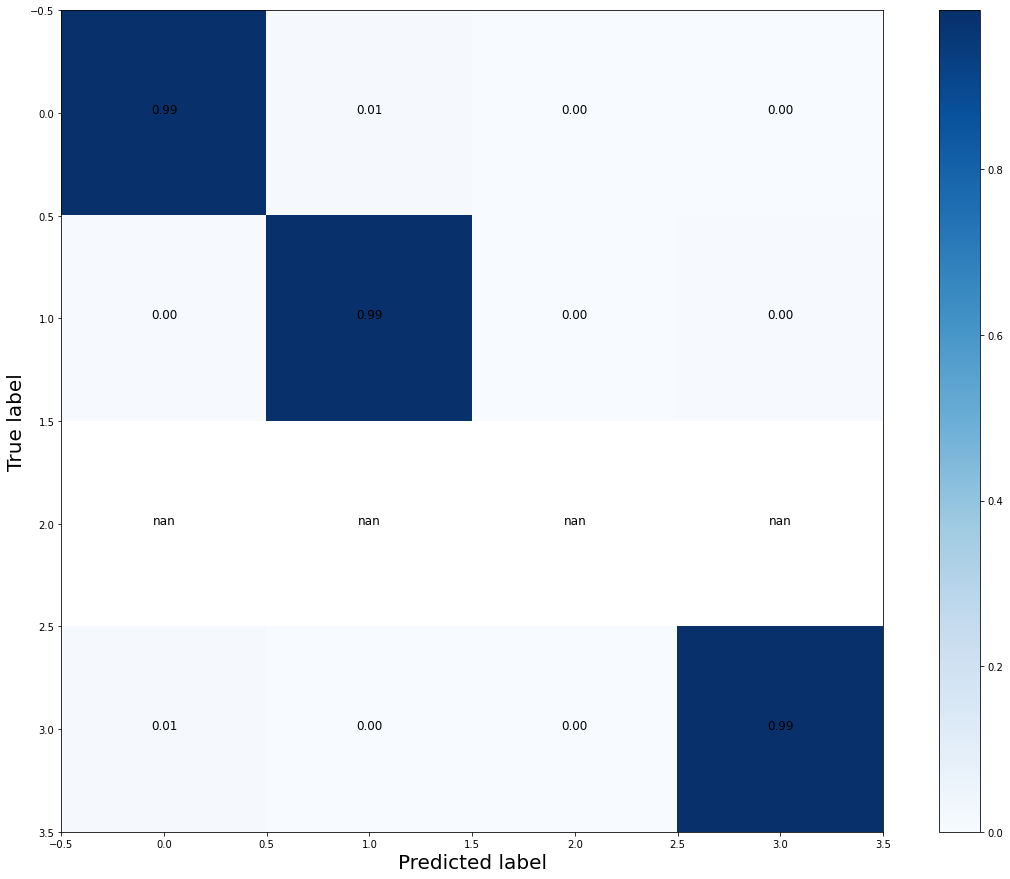

              precision    recall  f1-score   support

         3.0       0.98      0.99      0.99    943200
         4.0       0.99      0.99      0.99   1786050
         8.0       0.00      0.00      0.00         0
         9.0       0.99      0.99      0.99    955500

    accuracy                           0.99   3684750
   macro avg       0.74      0.74      0.74   3684750
weighted avg       0.99      0.99      0.99   3684750

Done  2


KeyboardInterrupt: 

In [71]:
test_per_list = p50_forecast['identifier'].unique()
save_dir = 'dlr_tft_results/'
total_acc, total_precision, total_recall, total_f1 = 0., 0., 0., 0.

for num in test_per_list:
    forecast = p50_forecast[p50_forecast['identifier'] == num]
    target = targets[targets['identifier'] == num]

    forecast = forecast.drop(['forecast_time', 'identifier'], axis=1)
    target = target.drop(['forecast_time', 'identifier'], axis=1)
    
    acc, precision, recall, f1 = getScores(forecast, target)
    
    result = pd.DataFrame([acc, precision, recall, f1])
    result = result.T
    result.columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    result.to_csv(save_dir + str(num) + 'result.csv')
    
    total_acc += acc
    total_precision += precision
    total_recall += recall
    total_f1 += f1
    
    print('Done ', num)

In [66]:
print('Average Accuracy: ', total_acc / len(test_per_list))
print('Average Precision: ', total_precision / len(test_per_list))
print('Average Recall: ', total_recall / len(test_per_list))
print('Average F1 Score: ', total_f1 / len(test_per_list))

Average Accuracy:  0.9490727403994761
Average Precision:  0.839382410840803
Average Recall:  0.7017247707729115
Average F1 Score:  0.7187410907182518


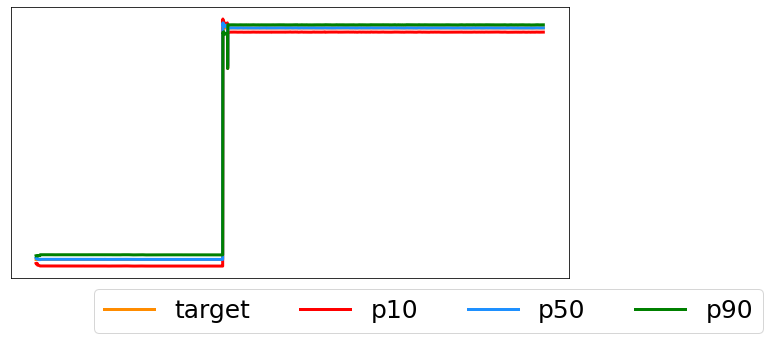

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5), facecolor='white')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.plot(output_map['targets']['t+0'][3000:8000], label='target', color='darkorange', linewidth=3)
plt.plot(output_map['p10']['t+0'][3000:8000], label='p10', color='red', linewidth=3)
plt.plot(output_map['p50']['t+0'][3000:8000], label='p50', color='dodgerblue', linewidth=3)
plt.plot(output_map['p90']['t+0'][3000:8000], label='p90', c='g', linewidth=3)
plt.legend(loc=(0.15, -0.2), ncol=4, fontsize=25)
plt.show()